In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('classic')
from mpl_toolkits import mplot3d

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
def sin_(m, n, x, y, phase=0):
    return np.sin(2*np.pi*(m*x + n*y) + phase)

def cos_(m, n, x, y, phase=0):
    return np.sin(2*np.pi*(m*x + n*y) + phase)

# Fourier Transform
def euler_(u, v, x, y):
    s1, s2 = u.size, v.size
    x, y = np.meshgrid(x, y)
    u, v = np.meshgrid(u, v)
    return np.exp(-2j*np.pi*(x*u.reshape(s1, s2, 1, 1) + y*v.reshape(s1, s2, 1, 1)))

def Fourier_Transform_(func, u, v, x, y):
    d1 = x[1] - x[0]
    d2 = y[1] - y[0]
    return (func * euler_(u, v, x, y)).sum((2, 3))*(d1*d2) # *(d1*d2)= *x[1]*y[1] 積分

def Inver_Fourier_Transform_(func, u, v, x, y):
    d1 = u[1] - u[0]
    d2 = v[1] - v[0]
    return  (func * (euler_(u, v, -x, -y).transpose(2, 3, 0, 1))).sum((2, 3))*(d1*d2) # *(d1*d2) = *u[1]*v[0] 積分

def Dis_euler_(u, v, x, y):
    s1, s2, n1, n2 = u.size, v.size, x.size ,y.size
    x, y = np.meshgrid(x, y)
    u, v = np.meshgrid(u, v)
    return np.exp(-2j*np.pi*((x*u.reshape(s1, s2, 1, 1))/n1 + (y*v.reshape(s1, s2, 1, 1))/n2 ))

def Dis_Fourier_Transform_(func, u, v, x, y):
    return (func * Dis_euler_(u, v, x, y)).sum((2, 3))

def Dis_Inver_Fourier_Transform_(func, u, v, x, y):
    return  ((func / func.size) * (Dis_euler_(u, v, -x, -y).transpose(2, 3, 0, 1))).sum((2, 3))

https://en.wikipedia.org/wiki/Fourier_transform                    
https://en.wikipedia.org/wiki/Multidimensional_transform
https://zh.wikipedia.org/wiki/%E4%BA%8C%E7%B6%AD%E5%82%85%E7%AB%8B%E8%91%89%E8%AE%8A%E6%8F%9B

Fourier Transform ![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/a1517b3f23f1e7630ef8e81ee8cbe22776c8bce2)

Discrete Fourier Transform ![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/8074ebe8a7a9e9c0a92fcd09a663798efe48391d)

### 隨機產生一個二維波(由n個合成)
#### 自己寫的array只能 120*120 QQ

In [4]:
n = 2 #幾個隨機合成波

randf = np.random.uniform(low=0.1, high=1.5, size=[n, 2]) # 頻率
randa = np.random.choice([-1, 1],size=[n]) * np.random.uniform(low=0.5, high=1.5, size=[n]) # 隨機正負*震幅
randp = np.random.uniform(high=np.pi*2, size=[n]) # 相位角

x = np.linspace(0, 10, 100, endpoint=False) # 展開時間 位置 list x軸
y = np.linspace(0, 10, 100, endpoint=False) # 展開時間 位置 list y軸
x1, x2 = np.meshgrid(x, y)
noise = np.random.normal(scale=1, size=x1.shape)
func_dic = {}
func = 0
for i in range(n):
    func_dic[i] = randa[i]*sin_(m=randf[i][0], n=randf[i][1], x=x1, y=x2, phase=randp[i])
    func += func_dic[i]
func += 0.*noise

(-5, 20)

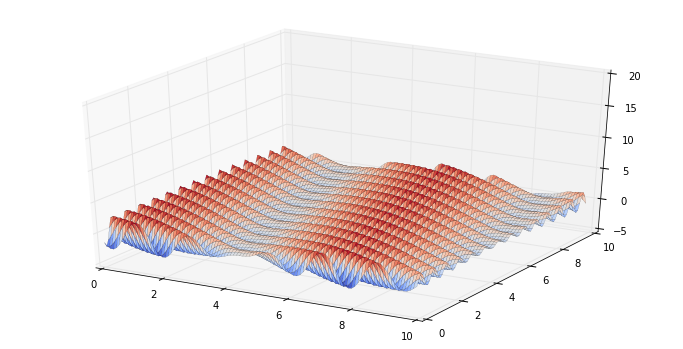

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]
ax = plt.axes(projection='3d')
#ax.contour3D(x1, x2, func, 25, cmap=cm.coolwarm)
ax.plot_surface(x1, x2, func, rcount=100, ccount=100, cmap=cm.coolwarm, linewidth=0.1)
#ax.plot_wireframe(x1, x2, func, rcount=100, ccount=100, linewidth=0.5)
ax.set_zlim(-5, 20)

In [6]:
print('頻率:', randf)
print('震幅:', randa)
print('相位:', randp/2/np.pi)

頻率: [[0.51692485 1.40225555]
 [0.66995024 1.43754531]]
震幅: [-1.47865073 -1.09770707]
相位: [0.18509149 0.01520041]


In [7]:
u = np.linspace(0, 3, 100, endpoint=False) # 展開頻率 list u軸
v = np.linspace(0, 3, 100, endpoint=False) # 展開頻率 list v軸
u1, u2 = np.meshgrid(v, u)

### 2D Fourier Transform

In [8]:
fft = Fourier_Transform_(func, u, v, x, y)

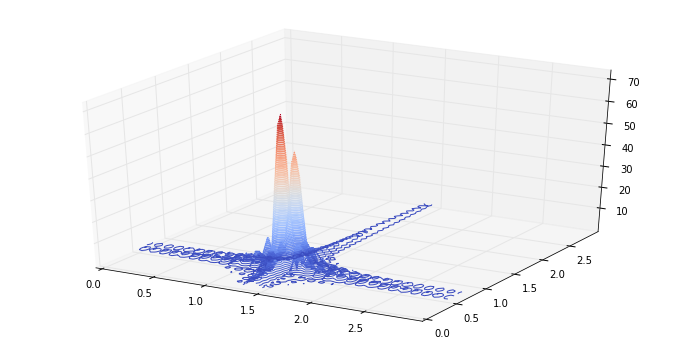

In [9]:
plt.rcParams['figure.figsize'] = [12, 6]
ax = plt.axes(projection='3d')
#ax.plot_surface(u2, u1, abs(fft), rcount=100, ccount=100, cmap=cm.coolwarm, linewidth=0.15)
#ax.plot_wireframe(u2, u1, abs(fft), rcount=100, ccount=100, linewidth=0.5)
ax.contour3D(u2, u1, abs(fft), 100, cmap=cm.coolwarm)

### 2D Inverse Fourier Transform

In [10]:
invfft = Inver_Fourier_Transform_(fft, u, v, x, y)

(-5, 5)

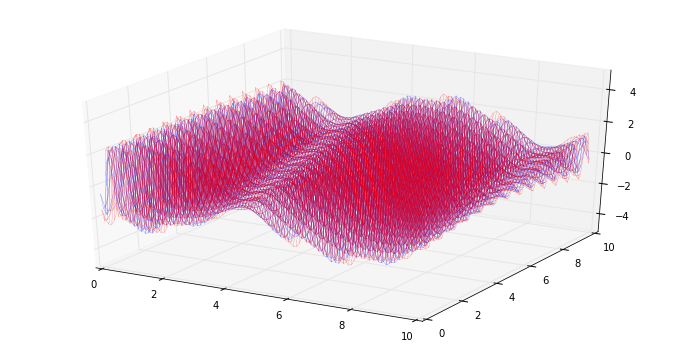

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]
ax = plt.axes(projection='3d')
ax.plot_wireframe(x1, x2, invfft.real*2, rcount=100, ccount=100, linewidth=0.15)
ax.plot_wireframe(x1, x2, func, rcount=100, ccount=100, color='r', linewidth=0.15)
ax.set_zlim(-5, 5)

In [12]:
print(np.allclose(func, invfft*2))
abs(func - (invfft.real*2)).mean() # 貼合 但沒有很完美!!

False


0.056064024754757046

### 2D Discrete Fourier transform 二維離散傅立葉變換 

In [13]:
x = u = np.arange(func.shape[1])
y = v = np.arange(func.shape[0])
x1, x2 = np.meshgrid(x, y)
u1, u2 = np.meshgrid(v, u)

(-5, 20)

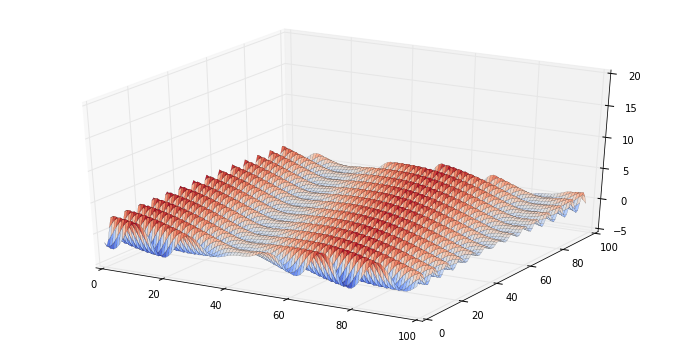

In [14]:
plt.rcParams['figure.figsize'] = [12, 6]
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, func, rcount=100, ccount=100, cmap=cm.coolwarm, linewidth=0.1)
ax.set_zlim(-5, 20)


### 2D Discrete Fourier Transform

In [15]:
dft = Dis_Fourier_Transform_(func, u, v, x, y)

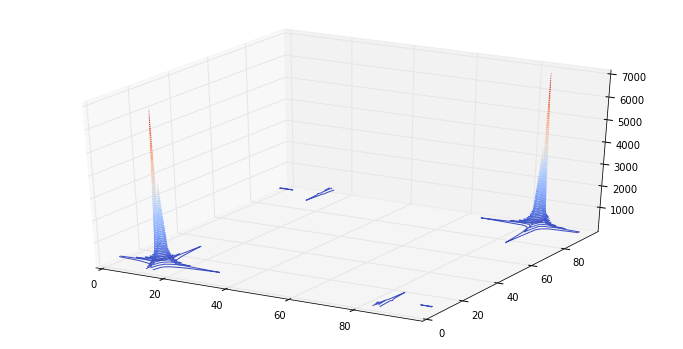

In [16]:
plt.rcParams['figure.figsize'] = [12, 6]
ax = plt.axes(projection='3d')
ax.contour3D(u2, u1, abs(dft), 100, cmap=cm.coolwarm)

### 2D Discrete Inverse Fourier Transform

In [17]:
invdft = Dis_Inver_Fourier_Transform_(dft, u, v, x, y)

(-5, 5)

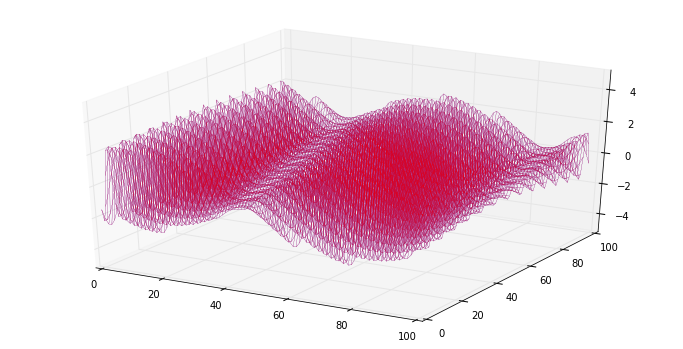

In [18]:
plt.rcParams['figure.figsize'] = [12, 6]
ax = plt.axes(projection='3d')
ax.plot_wireframe(x1, x2, invdft.real, rcount=100, ccount=100, linewidth=0.15)
ax.plot_wireframe(x1, x2, func, rcount=100, ccount=100, color='r', linewidth=0.15)
ax.set_zlim(-5, 5)

In [19]:
print(np.allclose(func, invdft))
abs(func - (invdft.real)).mean() # 相同

True


3.2329815772202607e-14

### Numpy 的 Fourier Transform 套件 np.fft
#### 2D要使用np.fft.fft'2'
####  快速傅立葉轉換(FFT)參考資料:
https://en.wikipedia.org/wiki/Discrete_Fourier_transform # 視為矩陣相乘
https://zh.wikipedia.org/wiki/%E5%BF%AB%E9%80%9F%E5%82%85%E9%87%8C%E5%8F%B6%E5%8F%98%E6%8D%A2

In [20]:
npfft = np.fft.fft2(func)
npifft = np.fft.ifft2(npfft)

In [21]:
print(np.allclose(npfft, dft))
abs((((npfft - dft)**2).sum())**0.5)/npfft.size # 完全相同

True


9.348281991307388e-15

In [22]:
print(np.allclose(npifft, invdft))
abs(npifft - invdft).mean() # 完全相同

True


5.029271906356324e-14

In [23]:
print(np.allclose(npifft, func))
abs(npifft - func).mean() # 原func完全相同

True


4.241221775020037e-16

#### test

In [24]:
func = np.random.uniform(size=(8, 8))
#func = np.ones(shape=[8, 8])
x = y = u = v = np.arange(func.shape[0])
x1, x2 = np.meshgrid(x, y)
u1, u2 = np.meshgrid(v, u)

In [25]:
npfft = np.fft.fft2(func)
npifft = np.fft.ifft2(npfft)
dft = Dis_Fourier_Transform_(func, u, v, x, y)
invdft = Dis_Inver_Fourier_Transform_(dft, u, v, x, y)

In [26]:
npfft.real.astype(int)

array([[34,  2,  1,  0,  0,  0,  1,  2],
       [-1,  0, -1, -3,  1,  0, -1,  0],
       [ 0,  0,  0, -1, -1,  1,  0,  0],
       [ 0, -1, -2,  0,  0,  0,  1,  0],
       [-1,  3,  0, -2,  2, -2,  0,  3],
       [ 0,  0,  1,  0,  0,  0, -2, -1],
       [ 0,  0,  0,  1, -1, -1,  0,  0],
       [-1,  0, -1,  0,  1, -3, -1,  0]])

In [27]:
dft.real.astype(int)

array([[34,  2,  1,  0,  0,  0,  1,  2],
       [-1,  0, -1, -3,  1,  0, -1,  0],
       [ 0,  0,  0, -1, -1,  1,  0,  0],
       [ 0, -1, -2,  0,  0,  0,  1,  0],
       [-1,  3,  0, -2,  2, -2,  0,  3],
       [ 0,  0,  1,  0,  0,  0, -2, -1],
       [ 0,  0,  0,  1, -1, -1,  0,  0],
       [-1,  0, -1,  0,  1, -3, -1,  0]])

In [28]:
(npifft.real + 1e-8).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
(invdft.real + 1e-8).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [30]:
(npifft.real + 1e-8).astype(int) == (invdft.real + 1e-8).astype(int)

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [31]:
abs(npifft - func) < 1e-10

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])